# Challenge
* Identify key statistical data in June across all of the stations and years using the describe() function.
* Identify key statistical data in December across all stations and years using the describe() function.
* Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Dependencies for SQLAlchemy & Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Dependencies for plotting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
# Access the SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Function to access and query SQLite database file
Base = automap_base()

In [6]:
# Reflect database
Base.prepare(engine, reflect=True)

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create session link from Python to database
session = Session(engine)

In [20]:
# Perform a query to retrieve June data and precipitation scores
june_results = []
june_results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.extract('month', Measurement.date) == 6).all()
print(june_results)

# Perform a query to retrieve December data and precipitation scores
dec_results = []
dec_results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.extract('month', Measurement.date) == 12).all()
print(dec_results)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(june_results, columns=['date', 'precipitation'])
june_df.set_index(june_df['date'], inplace=True)
print(june_df.to_string(index=False))

dec_df = pd.DataFrame(dec_results, columns=['date', 'precipitation'])
dec_df.set_index(dec_df['date'], inplace=True)
print(dec_df.to_string(index=False))

       date  precipitation
 2010-06-01           0.00
 2010-06-02           0.01
 2010-06-03           0.00
 2010-06-04           0.00
 2010-06-05           0.00
 2010-06-06           0.00
 2010-06-07           0.00
 2010-06-08           0.00
 2010-06-09           0.00
 2010-06-10           0.00
 2010-06-11           0.00
 2010-06-12           0.00
 2010-06-13           0.00
 2010-06-14           0.00
 2010-06-15           0.00
 2010-06-16           0.00
 2010-06-17           0.00
 2010-06-18           0.00
 2010-06-19           0.00
 2010-06-20           0.00
 2010-06-21           0.00
 2010-06-22           0.00
 2010-06-23           0.00
 2010-06-24           0.00
 2010-06-25           0.00
 2010-06-26           0.02
 2010-06-27           0.00
 2010-06-28           0.00
 2010-06-29           0.00
 2010-06-30           0.00
 2011-06-01           0.07
 2011-06-02           0.00
 2011-06-03           0.56
 2011-06-04           0.89
 2011-06-05           0.00
 2011-06-06           0.00
 

In [24]:
# Sort the dataframe by date
june_df = june_df.sort_index()
print(june_df.to_string(index=False))

dec_df = dec_df.sort_index()
print(dec_df.to_string(index=False))

       date  precipitation
 2010-06-01           0.00
 2010-06-01           0.01
 2010-06-01           0.00
 2010-06-01            NaN
 2010-06-01           0.03
 2010-06-01           0.00
 2010-06-01           0.00
 2010-06-01           0.08
 2010-06-01           0.03
 2010-06-02           0.00
 2010-06-02           0.03
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.03
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.01
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.10
 2010-06-03           0.00
 2010-06-03           0.14
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.01
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 

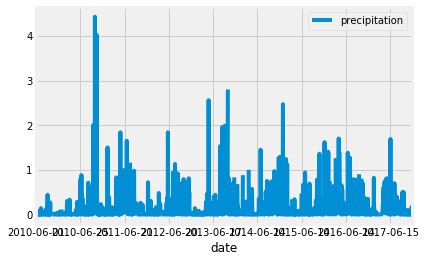

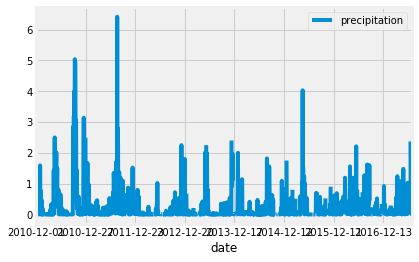

In [27]:
# Use Pandas Plotting with Matplotlib to plot June and December data
june_df.plot()
dec_df.plot()

In [31]:
# Use Pandas to calculate the summary statistics for June's precipitation data
june_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [32]:
# Use Pandas to calculate the summary statistics for December's precipitation data
dec_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [33]:
# Calculate the lowest temperature recorded, highest temperature recorded, and average temperature for June data
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(func.extract('month', Measurement.date) == 6).all()

[(64.0, 85.0, 74.94411764705882)]

In [34]:
# Calculate the lowest temperature recorded, highest temperature recorded, and average temperature for December data
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(func.extract('month', Measurement.date) == 12).all()

[(56.0, 83.0, 71.04152933421226)]

In [36]:
#session.query(Measurement.station, func.count(Measurement.station)).\
    #group_by('year', Measurement.date).all()
    #group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()